In [6]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 1000
age = np.random.randint(18, 70, num_samples)
income = np.random.randint(20000, 100000, num_samples)
gender = np.random.choice(['Male', 'Female'], num_samples)
website_visits = np.random.randint(0, 30, num_samples)
product_interest = np.random.choice(['Low', 'Medium', 'High'], num_samples)
purchased = np.random.choice([0, 1], num_samples, p=[0.7, 0.3])  # 30% purchase rate

# Create a DataFrame
data = pd.DataFrame({
    'Age': age,
    'Income': income,
    'Gender': gender,
    'WebsiteVisits': website_visits,
    'ProductInterest': product_interest,
    'Purchased': purchased
})

# Display the first few rows of the dataset
print(data.head())


   Age  Income  Gender  WebsiteVisits ProductInterest  Purchased
0   56   54674  Female             15          Medium          0
1   69   55854  Female             14            High          1
2   46   66271    Male             26            High          0
3   32   93688  Female             14          Medium          1
4   60   58518    Male              5          Medium          0


Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.99      0.80       201
           1       0.33      0.01      0.02        99

    accuracy                           0.67       300
   macro avg       0.50      0.50      0.41       300
weighted avg       0.56      0.67      0.54       300



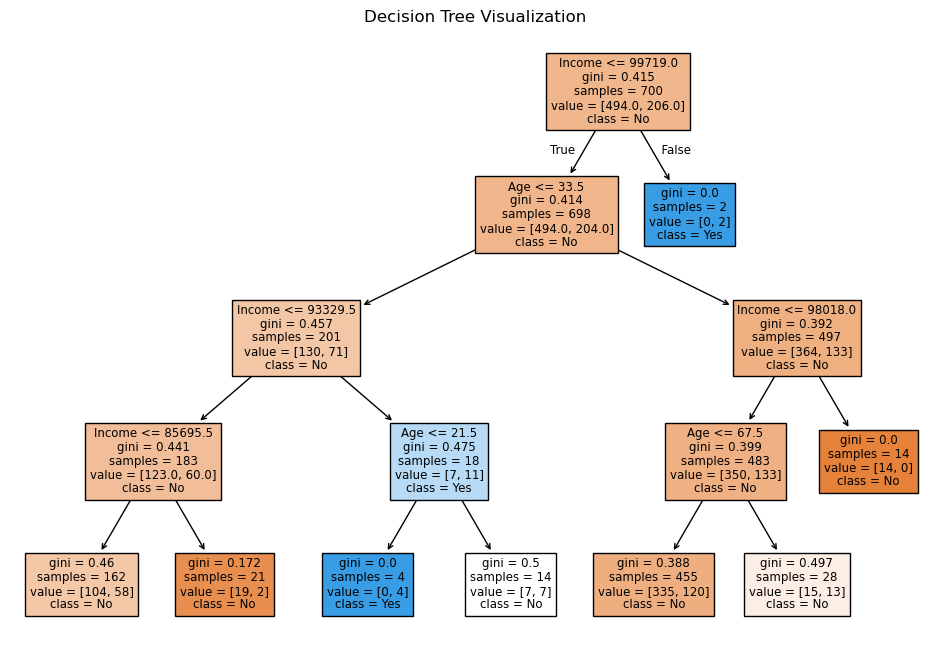

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Encode categorical variables
label_encoders = {}
for column in ['Gender', 'ProductInterest']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features and target variable
X = data.drop(columns=['Purchased'])  # Features
y = data['Purchased']                # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42, max_depth=4)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()
